In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# 載入檔案
train_file = pd.read_csv('archive/emnist-bymerge-train.csv')
test_file = pd.read_csv('archive/emnist-bymerge-test.csv')

In [3]:
train_file.head()

,24,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.431,0.432,0.433,0.434,0.435,0.436,0.437,0.438,0.439,0.440
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_file.head()

,24,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.457,0.458,0.459,0.460,0.461,0.462,0.463,0.464,0.465,0.466
0,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# label代表數字和字母順序
train_file.rename(columns={'24':'label'}, inplace=True)
test_file.rename(columns={'24':'label'}, inplace=True)

In [6]:
train_file.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.431,0.432,0.433,0.434,0.435,0.436,0.437,0.438,0.439,0.440
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_file.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.457,0.458,0.459,0.460,0.461,0.462,0.463,0.464,0.465,0.466
0,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
np.sort(train_file.label.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], dtype=int64)

In [9]:
# 只需要大寫字母(車牌皆大寫)
train_file = train_file[train_file['label'] < 36]
test_file = test_file[test_file['label'] < 36]

In [10]:
np.sort(train_file.label.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)

In [11]:
# label
alphabet = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L'
            ,'M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [12]:
# 第一行是label，其餘是feature
X_train, y_train = train_file.iloc[:, 1:].values, train_file.iloc[:, 0].values

In [13]:
X_test, y_test = test_file.iloc[:,1:].values, test_file.iloc[:,0].values

In [14]:
test_perc = int((len(X_test) / len(X_train)) * 100)
train_perc = 100 - test_perc
print('train:test = ' + str(train_perc) + ' : ' + str(test_perc))

train:test = 84 : 16


Label: 0, alphabet: 0


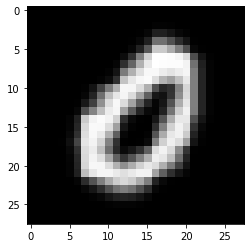

In [15]:
# 顯示圖片
index = np.random.randint(0,len(y_train) - 1)

print("Label: " + str(y_train[index]) + ', alphabet: ' + alphabet[(y_train[index])])

image= X_train[index]
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image, cmap=plt.cm.gray)

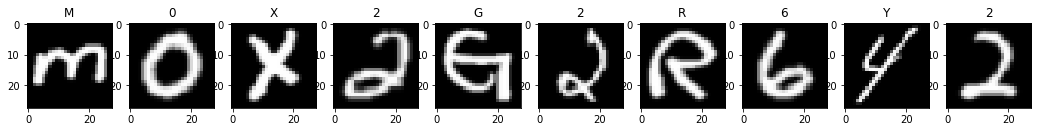

In [16]:
r = np.random.randint(0,len(y_train) - 50)

plt.figure(figsize=(18, 6))

for i in range(r, r + 10):
    plt.subplot(1, 10, i - r + 1)
    image= X_train[i]
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(alphabet[y_train[i]])

In [17]:
# 因為車牌上的數字比訓練模型厚很多，所以我在每個把每個像素乘以一個倍數直到255
def add_weight(arr):
    arr = list(arr)
    for i in range(0,784):
        # 全白(0)不影響
        result = arr[i] * 2.5
        if result >= 255:
            arr[i] = 255
        else:
            arr[i] = int(result)
    return np.array(arr)

In [18]:
len(X_train)

586405

In [19]:
for i in range(len(X_train)):
    X_train[i] = add_weight(X_train[i])

In [20]:
for i in range(len(X_test)):
    if y_test[i] == 5:
        index1 = i
        break

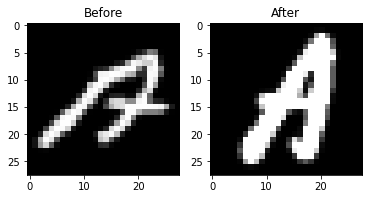

In [21]:
# 前後差別
for i in range(len(X_test)):
    if y_test[i] == 10:
        index1 = i
        break

for i in range(len(X_train)):
    if y_train[i] == 10:
        index2 = i
        break   

plt.figure()
plt.subplot(1, 2, 1)
image = X_test[index1]
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.title('Before')
plt.imshow(image, cmap=plt.cm.gray)

plt.subplot(1, 2, 2)
image = X_train[index2]
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.title('After')
plt.imshow(image, cmap=plt.cm.gray)

In [22]:
len(X_test)

97655

In [23]:
for i in range(0, len(X_test)):
    X_test[i] = add_weight(X_test[i])

In [24]:
rfc = RandomForestClassifier(n_estimators=150, oob_score=True, n_jobs=-1,
                             min_samples_leaf=2 ,min_samples_split=3)
rfc.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=3,
                       n_estimators=150, n_jobs=-1, oob_score=True)

In [25]:
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.81      0.74      5745
           1       0.68      0.90      0.77      6400
           2       0.92      0.97      0.94      5765
           3       0.95      0.98      0.96      5827
           4       0.92      0.96      0.94      5498
           5       0.90      0.88      0.89      5326
           6       0.95      0.98      0.97      5787
           7       0.97      0.98      0.97      5873
           8       0.93      0.95      0.94      5655
           9       0.96      0.97      0.97      5651
          10       0.89      0.93      0.91      1058
          11       0.92      0.60      0.73       652
          12       0.95      0.95      0.95      2156
          13       0.90      0.69      0.78       735
          14       0.96      0.82      0.89       860
          15       0.93      0.90      0.92      1524
          16       0.96      0.63      0.76       430
          17       0.93    

In [26]:
print('accuracy : ' + str(round(accuracy_score(y_test, predictions) * 100, 3)) + '%')

accuracy : 87.213%


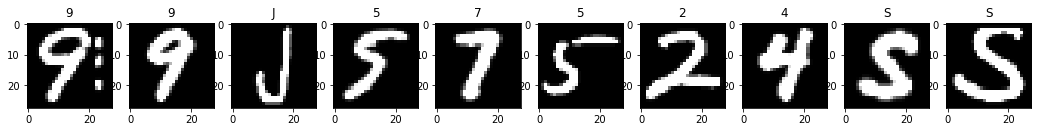

In [27]:
# prediction
r = 51
plt.figure(figsize=(18, 6))
for i in range(r, r + 10):
    plt.subplot(1, 10, i - r + 1)
    image= X_test[i]
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(alphabet[predictions[i]])

In [28]:
import joblib

In [29]:
joblib.dump(rfc, 'rfc_model')

['rfc_model']

In [30]:
import seaborn as sns

<AxesSubplot:>

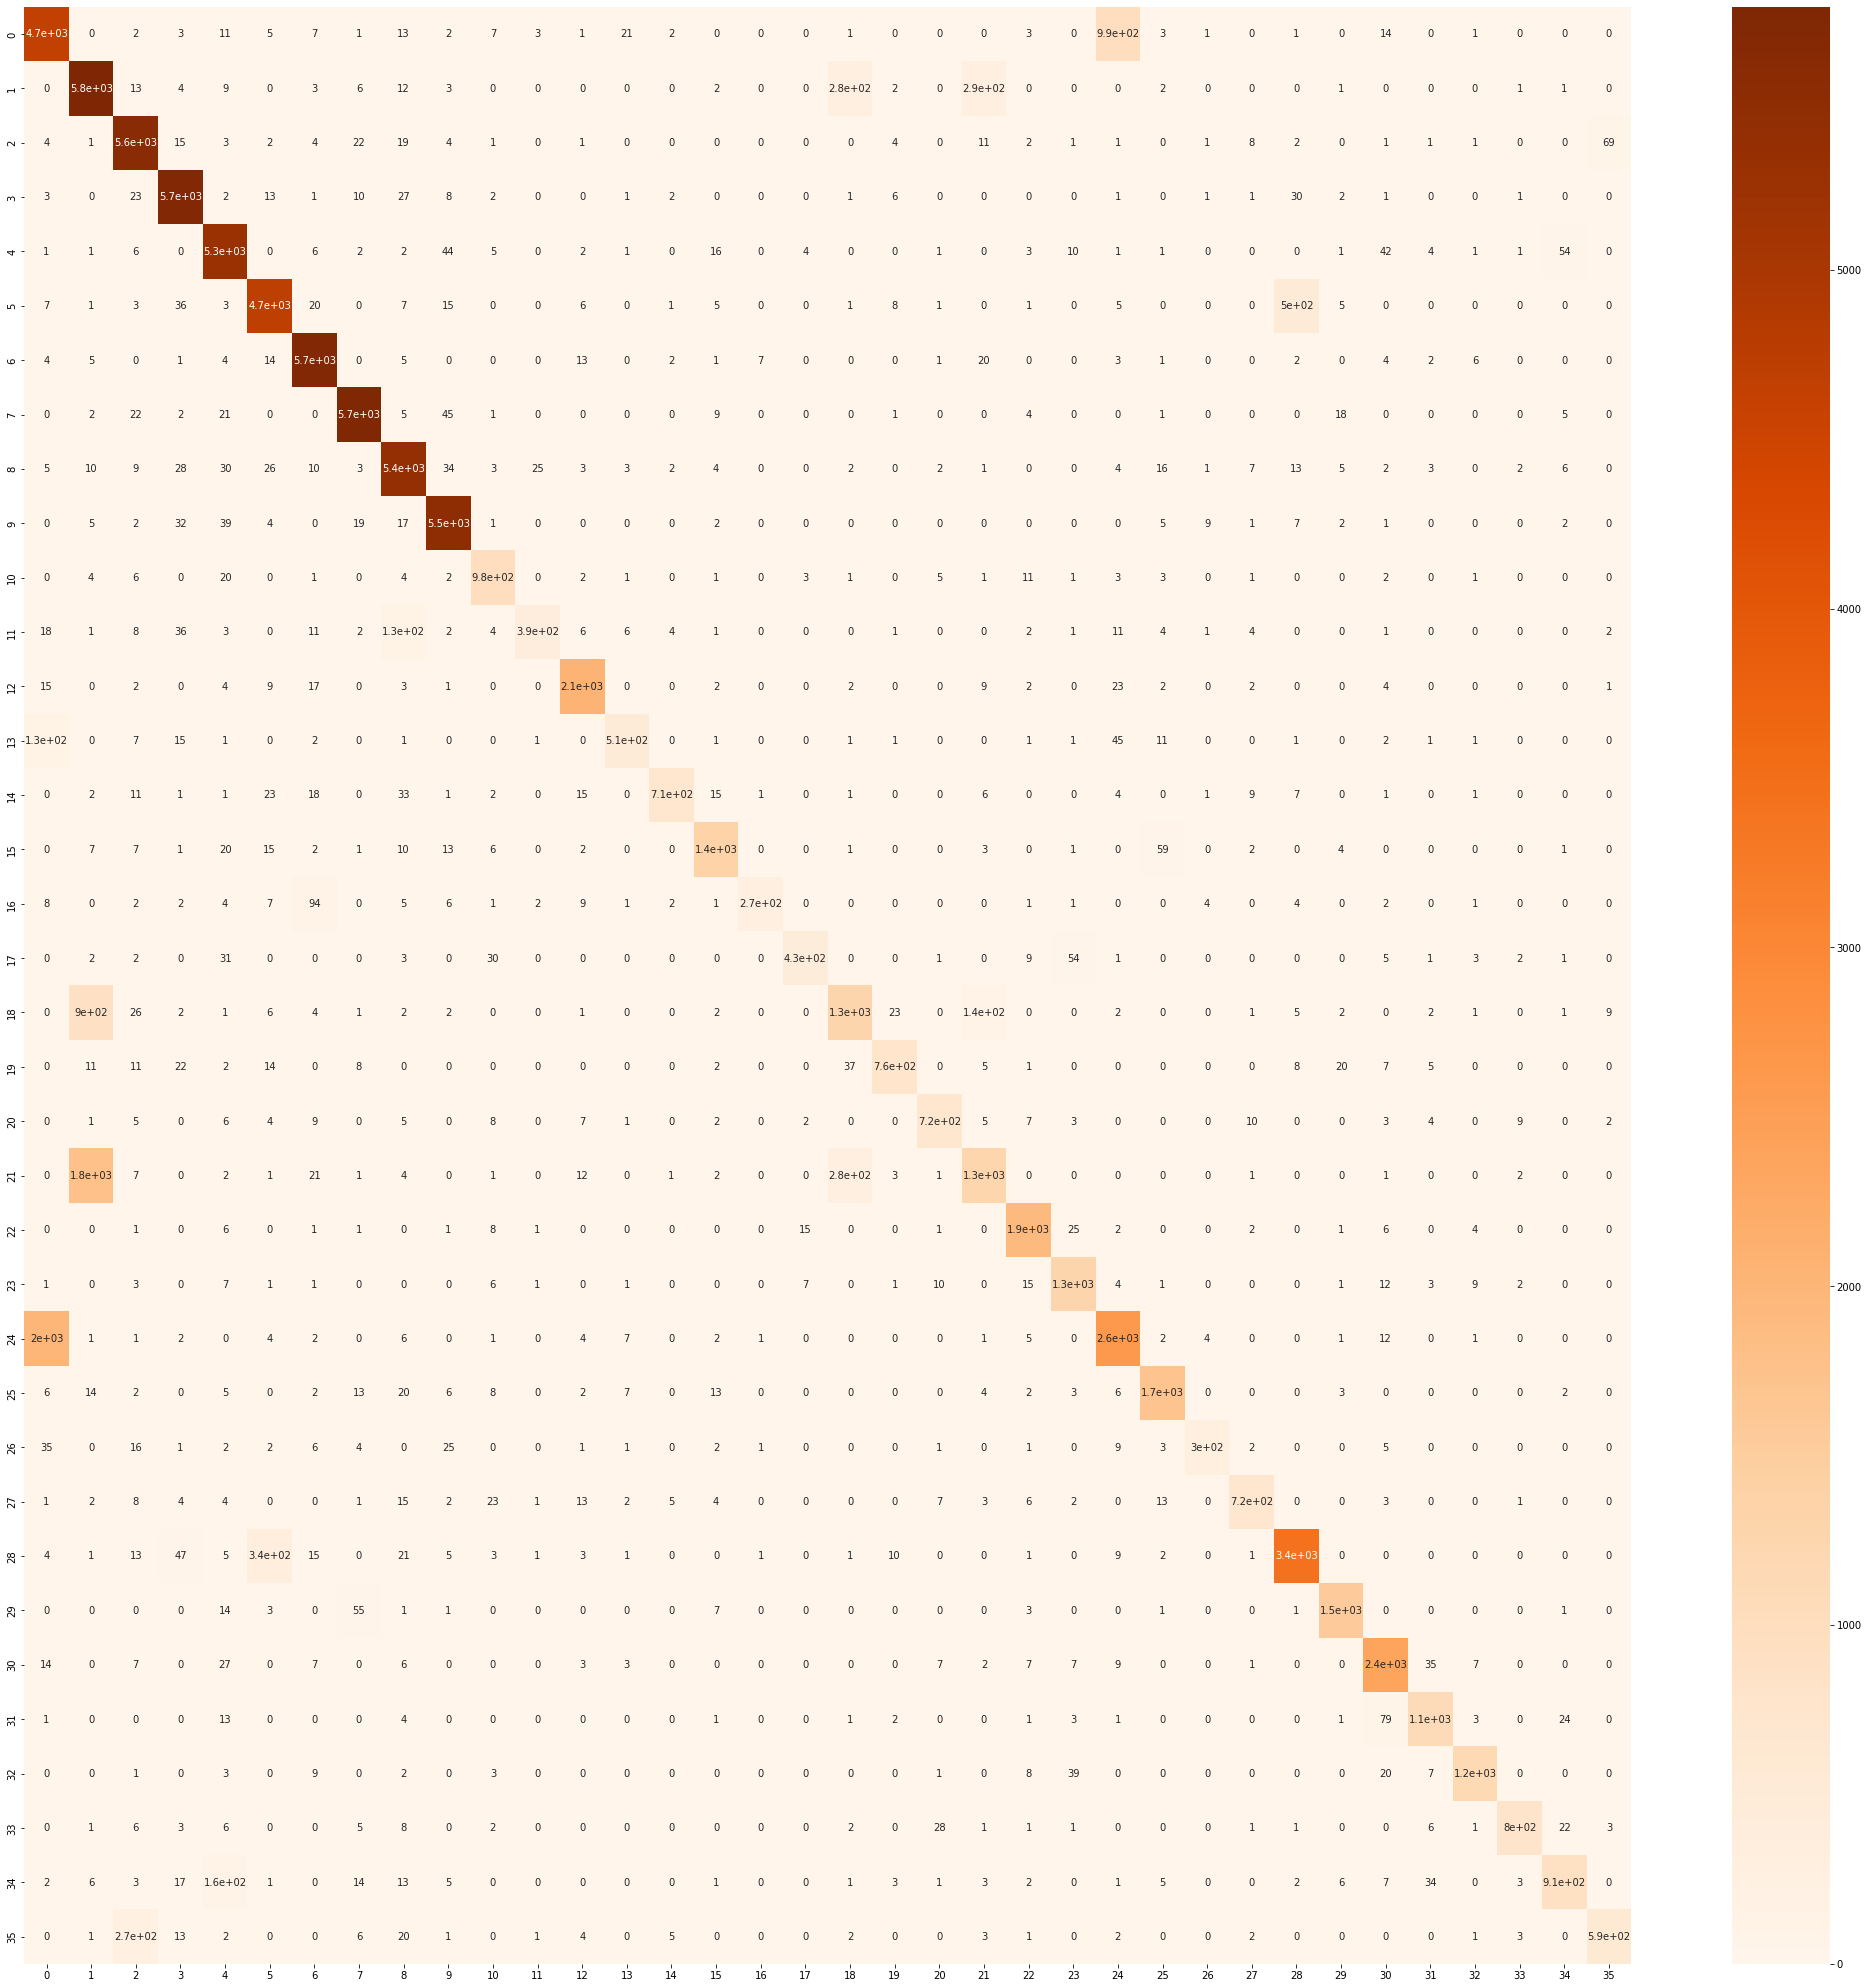

In [31]:
plt.figure(figsize=(36, 36))
df = pd.DataFrame(confusion_matrix(y_test, predictions))
sns.heatmap(df, cmap='Oranges', annot=True)